<h4> CO4: Imaging for the Life Sciences </h4>
<h2>Computed Tomography</h2>


<h4>1. Backprojection</h4>

Complete the given function named *backprojection*, that takes a sinogram as the argument and computes its backprojection.

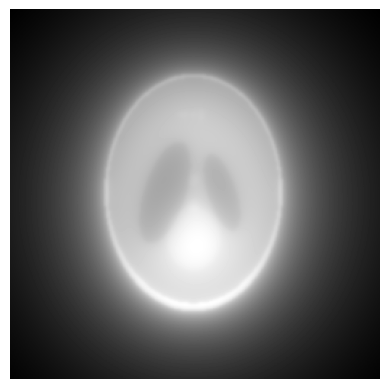

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

def backprojection(sinogram):
    """
    Computes a backprojection for a given sinogram

    Parameters:
    - sinogram: 2D numpy array containing the sinogram
    """

    # get number of projections (=rows) and angles (=columns)
    n_proj, n_angles = sinogram.shape
    print(n_proj, n_angles)

    # create a grid of coordinates representing the image space with origin in the center
    coord_vector = np.linspace(1, n_proj, n_proj) - n_proj // 2
    x, y = np.meshgrid(coord_vector, coord_vector)

    # get list of angles (in radians)
    angles = np.radians(np.linspace(0, 179, n_angles))

    # create a 2D array to store the backprojection
    backproj = np.zeros((n_proj, n_proj))
    
    # iterate over all angles
    for i, angle in enumerate(angles):

        # compute the projection line
        x1 = x * np.cos(angle) + y * np.sin(angle)
        x1 = x1 + n_proj // 2 # shift to image indices

        # interpolate the sinogram values
        proj = np.interp(x1, np.arange(n_proj), sinogram[:, i])

        # add the current projection to the backprojection
        backproj += proj

        # display progress (show every 10th angle)
        if i % 10 == 0:
            display.clear_output(wait=True)
            plt.imshow(backproj, cmap="gray")
            plt.axis("off")
            display.display(plt.gcf())

    # normalize the backprojection
    backproj = backproj / n_angles

    # display the backprojection    
    display.clear_output(wait=True)
    plt.imshow(backproj, cmap="gray")
    plt.axis("off")
    # display.display(plt.gcf())

# load sinogram
sinogram = mpimg.imread("sinogram180.png")

# compute backprojection
backprojection(sinogram)


<h4>2. Windowing</h4>

Download CT data of Covid19 patients from:<br>
"COVID19-CT-Dataset: An Open-Access Chest CT Image Repository of 1000+ Patients with Confirmed COVID-19 Diagnosis" (Harvard Dataverse)<br>
--> https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6ACUZJ

*Note: Only download the data of **Subject (1)***

The following function loads a DICOM image using the Python module **pydicom**<br>
(*install required modules if necessary*)

In [6]:
import pydicom

def load_dicom_image(file_path):
    """
    Load a DICOM image
    
    Parameters:
    - file_path: Path to the DICOM file
    
    Returns:
    - dicom_image: 2D numpy array representing the DICOM image
    """

    # Load the DICOM file and return it as a numpy array
    return pydicom.dcmread(file_path).pixel_array

For the next steps the DICOM file with the name "56364758.dcm" shall be used. It shows a slice of the torso including both, heart and lung.

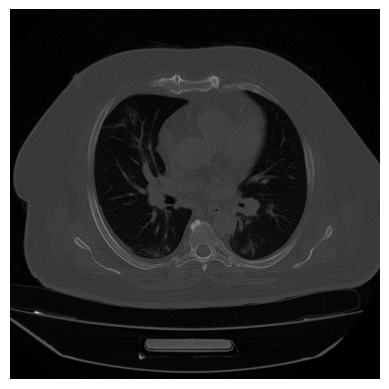

In [4]:
import matplotlib.pyplot as plt

# load and plot the DICOM image
dicom_image = load_dicom_image("./Subject_1/98.12.2/56364758.dcm")
plt.imshow(dicom_image, cmap="gray")
plt.axis("off")
plt.show()

Complete the code below to perform windowing.

In [12]:
import numpy as np

def apply_windowing(image, window_center, window_width):
    """
    Apply CT windowing to an image.
    
    Parameters:
    - image: 2D numpy array representing the DICOM image
    - window_center: Window level (WL)
    - window_width: Window width (WW)
    
    Returns:
    - windowed_image: 2D numpy array representing the windowed image
    """

    # Compute the window boundaries
    min_value = window_center - (window_width / 2)
    max_value = window_center + (window_width / 2)

    # Apply the windowing
    windowed_image = np.clip(image, min_value, max_value)
    windowed_image = np.round((windowed_image - min_value) / window_width * 255)
    return windowed_image

Apply the *bone window* and the *lung window* to the selected image and plot the result.

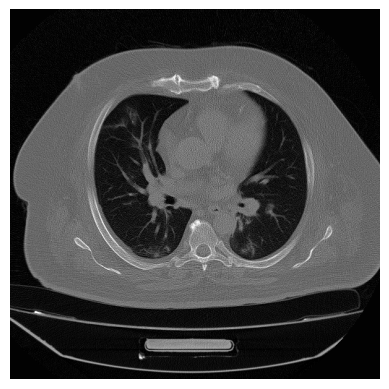

In [13]:
# Specify window level and window width for bone window
window_center = 1000  # predefined WL for bone window
window_width = 2500   # predefined WW for bone window

# Apply windowing to the DICOM image
windowed_image = apply_windowing(dicom_image, window_center, window_width)

# plot
plt.imshow(windowed_image, cmap="gray")
plt.axis("off")
plt.show()

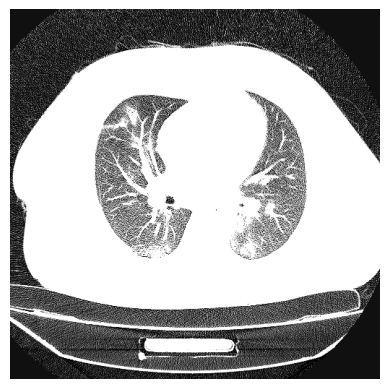

In [14]:
# Specify window level and window width for lung window
window_center = -600  # predefined WL for lung window
window_width = 1900   # predefined WW for lung window

# Apply windowing to the DICOM image
windowed_image = apply_windowing(dicom_image, window_center, window_width)

# plot
plt.imshow(windowed_image, cmap="gray")
plt.axis("off")
plt.show()